In [22]:
import torch # YOLOv5 implemented using pytorch
from IPython.display import Image #this is to render predictions
import cv2
import os
from os import listdir
import gc
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
from numpy import zeros
import sys

from PIL import Image
import json
import requests
import torchvision.transforms as transforms

import matplotlib.path as mpath
import matplotlib.patches as mpatches
import matplotlib.image as mpimg
from matplotlib.patches import Rectangle

#!git clone https://github.com/ultralytics/yolov5

In [7]:
torch.cuda.is_available()

True

In [9]:
%cd yolov5
#!pip install -r requirements.txt %Only needed to run once


[WinError 2] The system cannot find the file specified: 'yolov5'
C:\Users\LittlePC\Documents\GitHub\ECE4078-G7\milestone3\network\scripts\yolov5


In [10]:
torch.cuda.empty_cache()
#gc.collect() 

In [11]:
!python train.py --img 640 --batch 8 --epochs 100 --data data/datasets/data.yaml --weights yolov5l.pt --workers 3 --name Fruits_results
#total time taken: 1.868 hours for 50 epochs



train: weights=yolov5l.pt, cfg=, data=data/datasets/data.yaml, hyp=data\hyps\hyp.scratch-low.yaml, epochs=100, batch_size=8, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=3, project=runs\train, name=Fruits_results, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 
YOLOv5  v6.2-109-g23701ea Python-3.9.7 torch-1.11.0+cu113 CUDA:0 (NVIDIA GeForce RTX 3060 Ti, 8192MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0

       0/99      4.92G    0.07122    0.02652    0.04528         15        640:  88%|########8 | 158/179 [00:42<00:04,  4.36it/s]
       0/99      4.92G    0.07122    0.02652    0.04528         15        640:  89%|########8 | 159/179 [00:42<00:04,  4.41it/s]
       0/99      4.92G    0.07114    0.02647    0.04521         16        640:  89%|########8 | 159/179 [00:42<00:04,  4.41it/s]
       0/99      4.92G    0.07114    0.02647    0.04521         16        640:  89%|########9 | 160/179 [00:42<00:04,  4.30it/s]
       0/99      4.92G    0.07108    0.02643    0.04515         18        640:  89%|########9 | 160/179 [00:42<00:04,  4.30it/s]
       0/99      4.92G    0.07108    0.02643    0.04515         18        640:  90%|########9 | 161/179 [00:42<00:04,  4.37it/s]
       0/99      4.92G      0.071    0.02637     0.0451         17        640:  90%|########9 | 161/179 [00:42<00:04,  4.37it/s]
       0/99      4.92G      0.071    0.02637     0.0451         17        640:  91%|######### | 1

      11/99      4.82G    0.02741     0.0076      0.005         12        640:  88%|########8 | 158/179 [00:35<00:04,  4.30it/s]
      11/99      4.82G    0.02745   0.007604   0.005001         18        640:  88%|########8 | 158/179 [00:36<00:04,  4.30it/s]
      11/99      4.82G    0.02745   0.007604   0.005001         18        640:  89%|########8 | 159/179 [00:36<00:04,  4.37it/s]
      11/99      4.82G    0.02745   0.007606   0.004989         16        640:  89%|########8 | 159/179 [00:36<00:04,  4.37it/s]
      11/99      4.82G    0.02745   0.007606   0.004989         16        640:  89%|########9 | 160/179 [00:36<00:04,  4.40it/s]
      11/99      4.82G    0.02744   0.007605   0.004974         14        640:  89%|########9 | 160/179 [00:36<00:04,  4.40it/s]
      11/99      4.82G    0.02744   0.007605   0.004974         14        640:  90%|########9 | 161/179 [00:36<00:04,  4.43it/s]
      11/99      4.82G    0.02744   0.007598   0.004968         14        640:  90%|########9 | 1

      23/99      4.83G    0.02184     0.0067   0.003526         12        640:  88%|########7 | 157/179 [00:35<00:04,  4.48it/s]
      23/99      4.83G    0.02184     0.0067   0.003526         12        640:  88%|########8 | 158/179 [00:35<00:04,  4.49it/s]
      23/99      4.83G    0.02179   0.006688   0.003518         13        640:  88%|########8 | 158/179 [00:35<00:04,  4.49it/s]
      23/99      4.83G    0.02179   0.006688   0.003518         13        640:  89%|########8 | 159/179 [00:35<00:04,  4.50it/s]
      23/99      4.83G    0.02178   0.006704   0.003505         20        640:  89%|########8 | 159/179 [00:35<00:04,  4.50it/s]
      23/99      4.83G    0.02178   0.006704   0.003505         20        640:  89%|########9 | 160/179 [00:35<00:04,  4.52it/s]
      23/99      4.83G    0.02177   0.006711   0.003495         15        640:  89%|########9 | 160/179 [00:35<00:04,  4.52it/s]
      23/99      4.83G    0.02177   0.006711   0.003495         15        640:  90%|########9 | 1

      37/99      4.83G    0.01788   0.006125   0.002839         20        640:  18%|#7        | 32/179 [00:07<00:34,  4.26it/s]
      37/99      4.83G    0.01788   0.006125   0.002839         20        640:  18%|#8        | 33/179 [00:07<00:33,  4.33it/s]
      37/99      4.83G    0.01797   0.006086   0.002796         13        640:  18%|#8        | 33/179 [00:07<00:33,  4.33it/s]
      37/99      4.83G    0.01797   0.006086   0.002796         13        640:  19%|#8        | 34/179 [00:07<00:33,  4.29it/s]
      37/99      4.83G    0.01789   0.006043   0.002738         12        640:  19%|#8        | 34/179 [00:08<00:33,  4.29it/s]
      37/99      4.83G    0.01789   0.006043   0.002738         12        640:  20%|#9        | 35/179 [00:08<00:34,  4.22it/s]
      37/99      4.83G    0.01792   0.006072   0.003011         19        640:  20%|#9        | 35/179 [00:08<00:34,  4.22it/s]
      37/99      4.83G    0.01792   0.006072   0.003011         19        640:  20%|##        | 36/179 [

      50/99      4.83G    0.01501   0.005105   0.001913         13        640:  53%|#####2    | 94/179 [00:21<00:18,  4.50it/s]IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [14]:
model = torch.hub.load('ultralytics/yolov5', 'custom', path='runs/train/Fruits_results/weights/last.pt')  #using the last epoch 

Using cache found in C:\Users\LittlePC/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2022-9-12 Python-3.9.7 torch-1.11.0+cu113 CUDA:0 (NVIDIA GeForce RTX 3060 Ti, 8192MiB)

Fusing layers... 
Model summary: 367 layers, 46129818 parameters, 0 gradients, 107.7 GFLOPs
Adding AutoShape... 


In [15]:
results = model(r"C:\Users\LittlePC\Downloads\test\different-of-fruits-realistic-vector-21566878.jpg")

results.show()

# Done training here, now add the images for detection

In [28]:
# get the path or directory 
#Load all the images here as an address 
folder_dir = r"C:\Users\LittlePC\Downloads\test\\"
imgs = []
for images in os.listdir(folder_dir):
    #compatible with all type of images
    if (images.endswith(".png") or images.endswith(".jpg")\
        or images.endswith(".jpeg")):
        images = folder_dir + images
        imgs.append(images) #store all the image address into the variable

In [37]:
#store all the detection as a boxes in tensor 
total_results = []
model.conf = 0.6 #threshold of 0.3 
for i in range(len(imgs)):
    #return in tensor format and move to cpu for plotting
    results = model(imgs[i]).xyxy[0].cpu()
    
    
    for i in range(len(results)):
        
        if results[i,5] == 0:
            results[i,5] = 5
        
        elif results[i,5] == 1:
            results[i,5] = 2
        
        elif results[i,5] == 2:
            results[i,5] = 4
        
        elif results[i,5] == 4:
            results[i,5] = 1            
    
    
    total_results.append(results)
    #results.show()

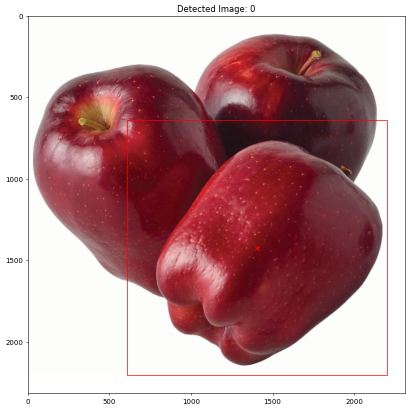

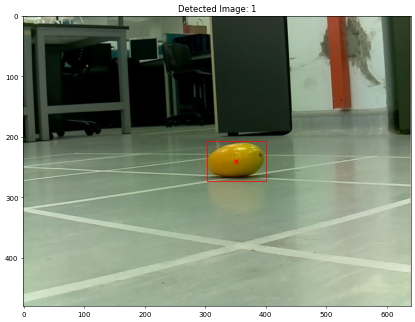

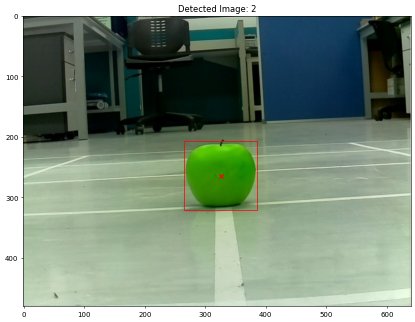

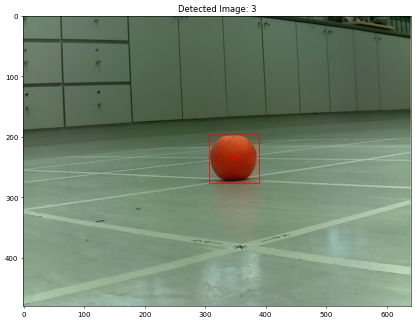

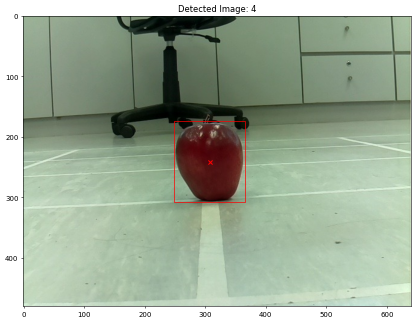

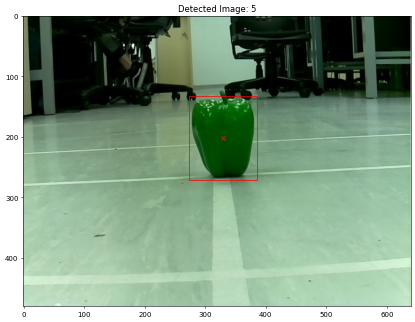

In [38]:
#Plot all the images and their detected head 
#Add the center of the detected head for shooting

for i in range(len(total_results)):
    #initialises all the empty array here for storing the values
    center_x = zeros(len(total_results[i]))
    center_y = zeros(len(total_results[i]))
    xmin = zeros(len(total_results[i]))
    ymin = zeros(len(total_results[i]))
    width = zeros(len(total_results[i]))
    height = zeros(len(total_results[i]))
    
    #Plot i number of images 
    fig = plt.figure(figsize=(10,10), dpi=50)
    img = mpimg.imread(imgs[i])
    imgplot = plt.imshow(img)
    plt.title('Detected Image: ' + str(i))
    a = total_results[i]
    
    #To detect images with more than 1 head
    for j in range(len(total_results[i])):   
        #Coordinates for plotting the boxes
        xmin[j]=(a[j,0])
        ymin[j]=(a[j,1])
        width[j]=((a[j,2] - a[j,0]))
        height[j]=((a[j,3] - a[j,1]))
        
        if len(a) >= 1: # if heads are detected
            #Coordinates for plotting the center of the heads
            center_x[j] = (a[j,0] + a[j,2])/2
            center_y[j] = (a[j,1] + a[j,3])/2 
            for k in range(len(xmin)):
                #Plot the boxes
                plt.gca().add_patch(Rectangle((xmin[k],ymin[k]),(width[k]),(height[k]),linewidth=1,edgecolor='r',facecolor='none'))
        #plot the center as shooting coordinate
        plt.scatter([center_x], [center_y],c='red', marker='x')
            
    #show the boxes and center of the head
    plt.show()

### Output the detected img to grayscale .png

In [34]:

for num in range(len(total_results)):
    
    abc = mpimg.imread(imgs[num])
    w, h = len(abc[1]) , len(abc)
    print(w,h)
    data = np.zeros((h, w), dtype=np.uint8)
    for i in range(len(total_results[num])):

        xmin = total_results[num][i,0] #xmin
        ymin = total_results[num][i,1] #ymin
        xmax = total_results[num][i,2] #xmax
        ymax = total_results[num][i,3] #ymax
        label = total_results[num][i,5] #label
        data[int(np.round(ymin)):int(np.round(ymax)), int(np.round(xmin)):int(np.round(xmax))] = int(label) #label


        #print(total_results[0][i])
        print(int(label))
        
    output = Image.fromarray(data, 'L')
    output.save('Image ' + str(num) + '.png')
    output.show()

2204 2204
1
640 480
4
640 480
2
640 480
3
640 480
1
640 480
5


In [ ]:
np.set_printoptions(threshold=100)
data

In [ ]:
w, h = 640, 480
data = np.zeros((h, w), dtype=np.uint8)



data[0:300, 0:200] = 200 # red patch in upper left
img = Image.fromarray(data, 'L')

img.save('my.png')
img.show()

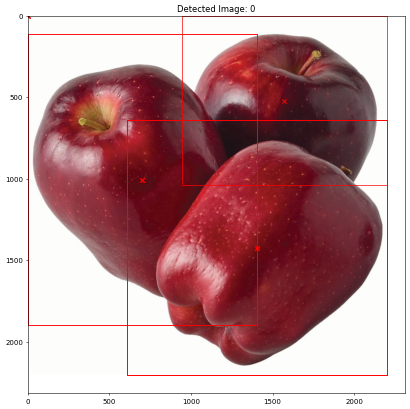

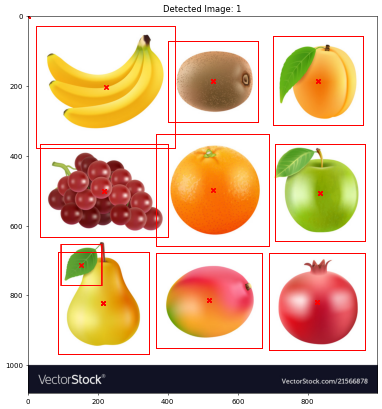

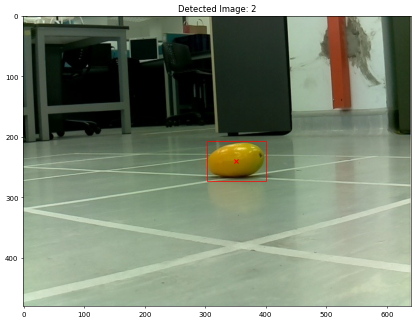

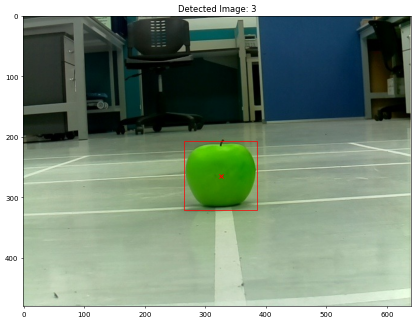

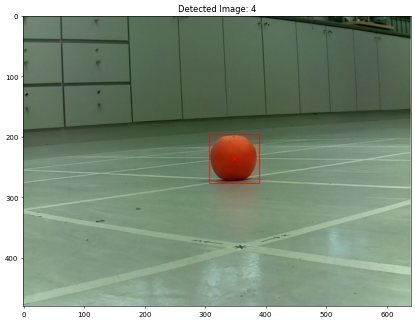

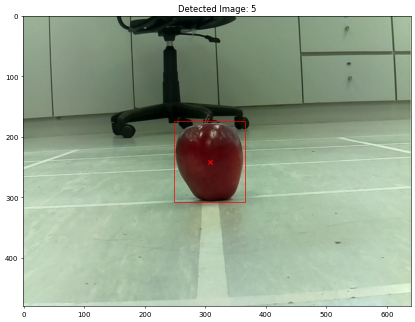

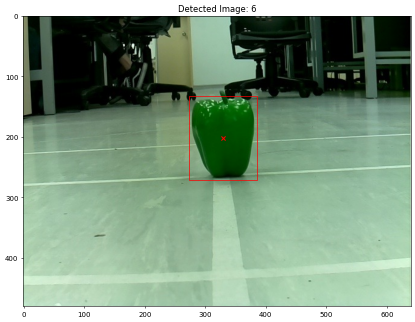

In [27]:
#Plot all the images and their detected head 
#Add the center of the detected head for shooting

for i in range(len(total_results)):
    #initialises all the empty array here for storing the values
    center_x = zeros(len(total_results[i]))
    center_y = zeros(len(total_results[i]))
    xmin = zeros(len(total_results[i]))
    ymin = zeros(len(total_results[i]))
    width = zeros(len(total_results[i]))
    height = zeros(len(total_results[i]))
    label = zeros(len(total_results[i]))
  
    #Plot i number of images 
    fig = plt.figure(figsize=(10,10), dpi=50)
    img = mpimg.imread(imgs[i]) #image read from the file above
    imgplot = plt.imshow(img)
    plt.title('Detected Image: ' + str(i))
    a = total_results[i]

    #To detect images with more than 1 head
    for j in range(len(total_results[i])):   

        #Coordinates for plotting the boxes
        xmin[j]=(a[j,0])
        ymin[j]=(a[j,1])
        width[j]=((a[j,2] - a[j,0]))
        height[j]=((a[j,3] - a[j,1]))
        label[j] = (a[j,5])
        
       
        if len(a) >= 1: # if heads are detected
            
            
            
            
            
            
            #Coordinates for plotting the center of the heads
            center_x[j] = (a[j,0] + a[j,2])/2
            center_y[j] = (a[j,1] + a[j,3])/2 
            for k in range(len(xmin)):
                
                
                
                
                
                #Plot the boxes
                plt.gca().add_patch(Rectangle((xmin[k],ymin[k]),(width[k]),(height[k]),linewidth=1,edgecolor='r',facecolor='none'))
       # plot the center as shooting coordinate
        plt.scatter([center_x], [center_y],c='red', marker='x')
            
    #show the boxes and center of the head
   
    plt.show()